In [1]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
file_path = "../data/raw/csv/adni_aibl_exact_age.csv"
df = pd.read_csv(file_path)

In [4]:
data_dic = df.to_dict('records')

## Distribution of time intervals between images of the same patient

### All possible pairs

In [5]:
df.columns

Index(['health_ad', 'patient_label', 'sex', 'health_emci', 'mri_manufacturer',
       'health_lmci', 'health_smc', 'dataset', 'health_mci',
       'study_patient_id', 'healthy', 'age', 'study_id', 'mri_field_strength',
       'study_image_id', 'image_label', 'age_exact', 'weighting'],
      dtype='object')

In [6]:
patients = df.patient_label.unique()

In [7]:
def all_age_differences(patients, diag_pair):
    diffs = []
    labels = []
    for pat in patients:
        cur_df = df.loc[df.patient_label == pat]
        cur_df = cur_df.sort_values(by=['age_exact'])
        records = cur_df.to_dict('records')
        n = len(records)
        for i in range(n):
            a = records[i]
            for j in range(i + 1, n):
                b = records[j]
                if a[diag_pair[0]] == 1 and b[diag_pair[1]] == 1:
                    diffs.append(b['age_exact'] - a['age_exact'])
                    labels.append(pat)

    return labels, diffs

38292


(array([4598., 2459., 3151., 2953., 4395., 1174., 1208., 2016., 3383.,
         875.,  663.,  919., 2093.,  479.,  495.,  736., 1186.,  389.,
         323.,  506.,  836.,  324.,  236.,  336.,  589.,  251.,  200.,
         226.,  376.,  150.,   89.,   96.,  222.,   61.,   64.,   36.,
         108.,   37.,   12.,   16.,   26.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
        11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  ]),
 <a list of 52 Patch objects>)

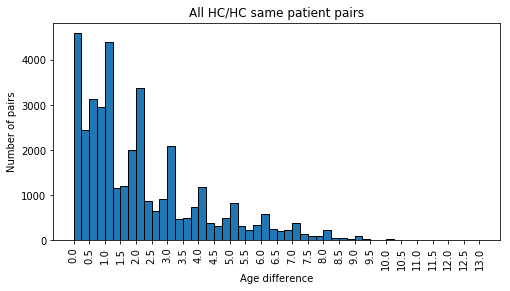

In [21]:
bins = np.linspace(0, 13, 13*4 + 1)
labels, diffs = all_age_differences(patients, ('healthy', 'healthy'))
print(len(diffs))
plt.figure(figsize=(8, 4))
plt.title("All HC/HC same patient pairs")
plt.xlabel("Age difference")
plt.ylabel("Number of pairs")
plt.xticks(np.linspace(0, 13, 13 * 2 + 1), rotation='vertical')
plt.hist(diffs, bins=bins, edgecolor='black')

In [9]:
# How many different patients per time difference
patient_diff = pd.DataFrame(data={'patient_label': labels, 'diff': diffs})

In [10]:
max_diff = 11
unique_patients = []
for i in range(len(bins) - 1):
    d = patient_diff.loc[(patient_diff['diff'] >= bins[i]) & (patient_diff['diff'] < bins[i + 1])]
    unique_patients.append(len(d.patient_label.unique()))

unique_patients

[604,
 350,
 400,
 344,
 515,
 181,
 203,
 273,
 494,
 125,
 103,
 115,
 300,
 88,
 93,
 98,
 193,
 58,
 54,
 69,
 130,
 51,
 40,
 46,
 71,
 41,
 36,
 34,
 50,
 28,
 16,
 15,
 37,
 11,
 12,
 6,
 22,
 6,
 3,
 3,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Text(0,0.5,'Distinct patients')

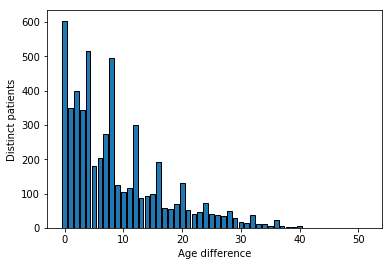

In [16]:
plt.bar(x=list(range(len(bins)-1)), height=unique_patients, edgecolor='black')
plt.xlabel("Age difference")
plt.ylabel("Distinct patients")

In [12]:
d = patient_diff.loc[patient_diff['diff'] == 1]
len(d.patient_label.unique())

154

In [13]:
len(unique_patients)

52

In [14]:
len(bins)

53

In [15]:
np.linspace(0, 13, 13 * 4 + 1)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  ])

In [17]:
bins

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  ])